# Import分はまとめる

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## クラスタリング

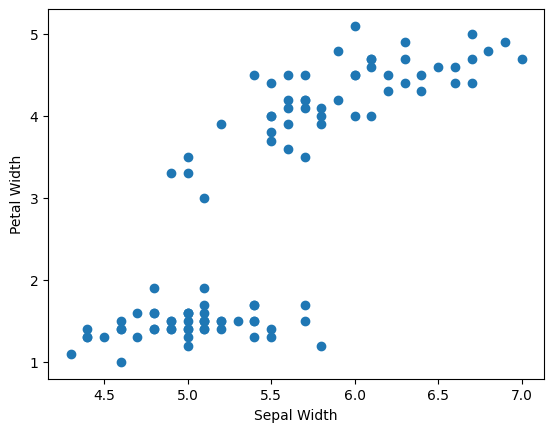

In [5]:
# irisのデータセットを読み込む
iris = load_iris()
X, y = iris.data[:100,[0,2]], iris.target[:100]
# dataを散布図でプロットする
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Petal Width")
plt.show()